In [48]:
import pandas as pd

In [70]:
df=pd.read_csv("/Users/meghaprajapati/Downloads/Encoding Data.csv")

In [50]:
df

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold
5,5,T,N,Green,Hot
6,6,F,N,Red,Cold
7,7,T,N,Red,Cold
8,8,F,N,Blue,Warm
9,9,F,Y,Red,Hot


In [51]:
df=df.rename(columns={"nom_0":"color","ord_2":"weather"})

In [52]:
df

,id,bin_1,bin_2,color,weather
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold
5,5,T,N,Green,Hot
6,6,F,N,Red,Cold
7,7,T,N,Red,Cold
8,8,F,N,Blue,Warm
9,9,F,Y,Red,Hot


In [53]:
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bin_1', ylabel='count'>

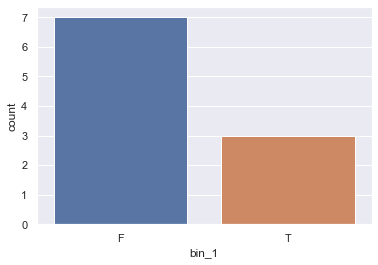

In [54]:
sns.countplot(df["bin_1"])


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bin_2', ylabel='count'>

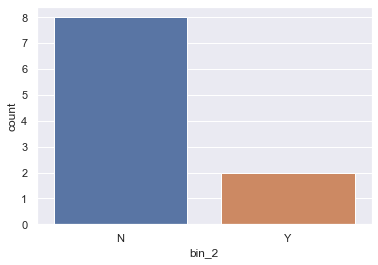

In [55]:
sns.countplot(df["bin_2"])

In [56]:
df.dtypes

id          int64
bin_1      object
bin_2      object
color      object
weather    object
dtype: object

In [57]:
df["bin_1"]=df["bin_1"].apply(
            lambda x: 1 if x=="T" else (0 if x=="F" else None))

In [58]:
df

,id,bin_1,bin_2,color,weather
0,0,0,N,Red,Hot
1,1,0,Y,Blue,Warm
2,2,0,N,Blue,Cold
3,3,0,N,Green,Warm
4,4,1,N,Red,Cold
5,5,1,N,Green,Hot
6,6,0,N,Red,Cold
7,7,1,N,Red,Cold
8,8,0,N,Blue,Warm
9,9,0,Y,Red,Hot


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["weather"]=le.fit_transform(df["weather"])


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather', ylabel='count'>

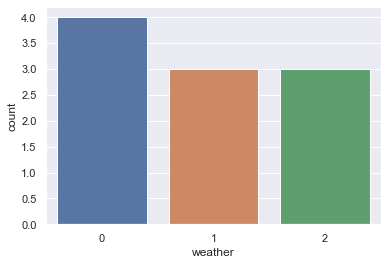

In [60]:
sns.set(style="darkgrid")
sns.countplot(df["weather"])

In [61]:
df.dtypes

id          int64
bin_1       int64
bin_2      object
color      object
weather     int64
dtype: object

In [62]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()

one=one.fit_transform(df[["color"]]).toarray()
encod=pd.DataFrame(one)
df=pd.concat([df,encod],axis=1)
df

,id,bin_1,bin_2,color,weather,0,1,2
0,0,0,N,Red,1,0.0,0.0,1.0
1,1,0,Y,Blue,2,1.0,0.0,0.0
2,2,0,N,Blue,0,1.0,0.0,0.0
3,3,0,N,Green,2,0.0,1.0,0.0
4,4,1,N,Red,0,0.0,0.0,1.0
5,5,1,N,Green,1,0.0,1.0,0.0
6,6,0,N,Red,0,0.0,0.0,1.0
7,7,1,N,Red,0,0.0,0.0,1.0
8,8,0,N,Blue,2,1.0,0.0,0.0
9,9,0,Y,Red,1,0.0,0.0,1.0


In [63]:
df=pd.get_dummies(df,prefix=["color"],columns=["color"])

In [64]:
df

,id,bin_1,bin_2,weather,0,1,2,color_Blue,color_Green,color_Red
0,0,0,N,1,0.0,0.0,1.0,0,0,1
1,1,0,Y,2,1.0,0.0,0.0,1,0,0
2,2,0,N,0,1.0,0.0,0.0,1,0,0
3,3,0,N,2,0.0,1.0,0.0,0,1,0
4,4,1,N,0,0.0,0.0,1.0,0,0,1
5,5,1,N,1,0.0,1.0,0.0,0,1,0
6,6,0,N,0,0.0,0.0,1.0,0,0,1
7,7,1,N,0,0.0,0.0,1.0,0,0,1
8,8,0,N,2,1.0,0.0,0.0,1,0,0
9,9,0,Y,1,0.0,0.0,1.0,0,0,1


Ordinal encoding:

when the feature contains order we perform ordinal encoding.

In [79]:
from sklearn.preprocessing import OrdinalEncoder
ord1 = OrdinalEncoder()
x=df[["bin_2"]]

output=ord1.fit_transform(x)
output

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [66]:
df

,id,bin_1,bin_2,weather,0,1,2,color_Blue,color_Green,color_Red
0,0,0,N,1,0.0,0.0,1.0,0,0,1
1,1,0,Y,2,1.0,0.0,0.0,1,0,0
2,2,0,N,0,1.0,0.0,0.0,1,0,0
3,3,0,N,2,0.0,1.0,0.0,0,1,0
4,4,1,N,0,0.0,0.0,1.0,0,0,1
5,5,1,N,1,0.0,1.0,0.0,0,1,0
6,6,0,N,0,0.0,0.0,1.0,0,0,1
7,7,1,N,0,0.0,0.0,1.0,0,0,1
8,8,0,N,2,1.0,0.0,0.0,1,0,0
9,9,0,Y,1,0.0,0.0,1.0,0,0,1
